# Sentiment Analysis using Logistic Regression and Bag of Words

### Setup

In [533]:
import numpy as np 
import pandas as pd

In [534]:
train = pd.read_csv("../train.csv")
val = pd.read_csv("../val.csv")

In [535]:
from sklearn.feature_extraction.text import CountVectorizer

In [536]:
vectorizer = CountVectorizer()

In [537]:
train_words = train.iloc[:,2]
train_labels = train.iloc[:,1]

In [538]:
def to_vec (arr): 
    one = [1, 0, 0, 0, 0]
    two = [0, 1, 0, 0, 0]
    three = [0, 0, 1, 0, 0]
    four = [0, 0, 0, 1, 0]
    five = [0, 0, 0, 0, 1]
    train_labels = []
    
    for i in range (0, arr.shape[0]): 
        x = arr.iloc[i]
        if x <= 0.2: 
            value = one
        elif x <= 0.4: 
            value = two
        elif x <= 0.6: 
            value = three
        elif x <= 0.8: 
            value = four 
        elif x <= 1:
            value = five
        else: 
            print(x)
            print(arr.iloc[x])
            assert(1 == 2)
        
        train_labels.append(value)
    
    train_labels = pd.DataFrame(train_labels)
    return train_labels

In [539]:
train_labels = to_vec(train_labels)
train_features = vectorizer.fit_transform(train_words)
print(train_features.shape)
print(train_labels.shape)

(191385, 18018)
(191385, 5)


In [540]:
print(train.iloc[97])

phrase_id                         151598
label                            0.70833
phrase       a delicate , surgical touch
Name: 97, dtype: object


In [541]:
val_words = val.iloc[:,2]
val_labels = val.iloc[:,1]
val_labels = to_vec(val_labels)
val_features = vectorizer.transform(val_words)
print(val_labels.shape)
print(val_features.shape)

(23923, 5)
(23923, 18018)


In [542]:
from sklearn import preprocessing 
train_features = preprocessing.normalize(train_features)
val_features = preprocessing.normalize(val_features)

### Logistic Regression

In [543]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [544]:
clf = OneVsRestClassifier(LogisticRegression(max_iter=10000))
clf.fit(train_features, train_labels)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [545]:
val_pred = clf.predict(val_features)

### Metrics

In [546]:
val_pred.shape
val_pred = np.argmax(val_pred, axis=1)
val_pred = np.apply_along_axis(lambda x: x + 1, 0, val_pred)

In [547]:
val_labels.shape
val_labels = val_labels.to_numpy()
val_labels = np.argmax(val_labels, axis=1)
val_labels = np.apply_along_axis(lambda x: x + 1, 0, val_labels)

In [548]:
print(val_labels[468])

1


In [549]:
from sklearn.metrics import accuracy_score
accuracy_score(val_pred, val_labels)

0.49287296743719433

In [554]:
for i in range (0, 100): 
    print(val_words[i])
    print("prediction:")
    print(val_pred[i])
    print("label:")
    print(val_labels[i])

and Mary-Louise Parker
prediction:
3
label:
3
believe any viewer , young or old ,
prediction:
3
label:
3
want a little more than this
prediction:
3
label:
3
, the documentary gives an especially poignant portrait of her friendship with the never flagging legal investigator David Presson .
prediction:
1
label:
4
back to Newcastle , the first half of Gangster No .
prediction:
3
label:
3
listless , witless
prediction:
2
label:
2
as cool and crowd-pleasing as a documentary can get
prediction:
1
label:
5
the master of innuendo . It is not what you see
prediction:
1
label:
3
the hapless victims of the arrogant
prediction:
1
label:
3
first . Many of the effective horror elements
prediction:
1
label:
3
is forced and heavy-handed , and occasionally simply unpleasant
prediction:
1
label:
2
does Steven Seagal come across these days ?
prediction:
3
label:
2
matinee brain
prediction:
3
label:
3
yet compulsively
prediction:
3
label:
3
A gimmick in search of a movie : how to get Carvey into as many s

### Graph

In [551]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc
sns.set_style("white")
rc('text', usetex=True)

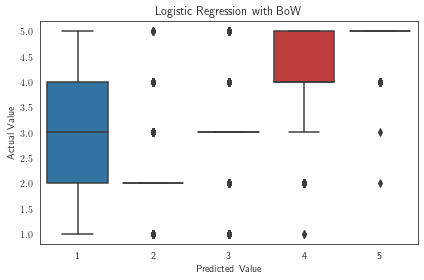

In [552]:
sns.boxplot(val_pred, val_labels)
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("Logistic Regression with BoW")
plt.tight_layout()
plt.savefig("visualization/lin_reg_scatter_BoW.png", bbox_inches="tight", dpi=400)

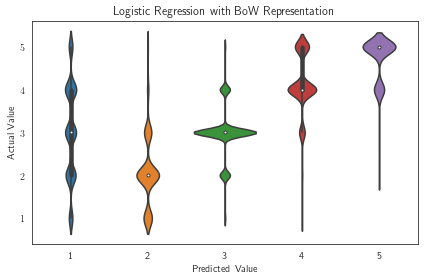

In [553]:
sns.violinplot(val_pred, val_labels)
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("Logistic Regression with BoW Representation")
plt.tight_layout()
plt.savefig("visualization/lin_reg_violin_BoW.png", bbox_inches="tight", dpi=400)